In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [2]:

####################################################################################################
####################################################################################################

file_xy  = "./predictions/xy_S2integrals.pkl"
df_xy    = pd.read_pickle(file_xy)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_r_true       = df_xy[:]['x'].as_matrix()
arr_r_tpf        = df_xy[:]['intr_x'].as_matrix()
arr_r_nn         = df_xy[:]['intr_x_nn'].as_matrix()
arr_r_pred       = df_xy[:]['x_pred'].as_matrix()

arr_dr_true_pred = arr_r_true - arr_r_pred
arr_dr_true_nn   = arr_r_true - arr_r_nn
arr_dr_true_tpf  = arr_r_true - arr_r_tpf



,event_number,x,y,intr_x,intr_y,intr_x_nn,intr_y_nn,x_pred,y_pred
100000,165461,11.452923,-4.799238,10.598371,-4.364035,10.831001,-4.523721,11.876449,-4.592309
100001,165462,19.004622,-14.180182,16.832707,-14.089599,16.632289,-13.558204,18.334438,-14.369053
100002,165463,-0.713852,-30.766732,-0.623434,-27.057018,-1.042401,-27.421310,0.265618,-29.168358
100003,165468,-31.193505,-19.178735,-27.057018,-14.338972,-25.929953,-13.704764,-29.622208,-16.939995
100004,165469,15.701762,-12.451200,13.341479,-10.348997,13.449440,-11.024782,14.928241,-10.978132


In [3]:

####################################################################################################
####################################################################################################

r_min     = -45
r_max     =  45
r_nbins   = 90

dr_nbins = 12*10
dr_range = [-6, 6]
dr_max   = 5

eps   = .001

r_mean_true  = np.mean(arr_r_true)
r_mean_tpf   = np.mean(arr_r_tpf )
r_mean_nn    = np.mean(arr_r_nn  )
r_mean_pred  = np.mean(arr_r_pred)

r_std_true   = np.std(arr_r_true)
r_std_tpf    = np.std(arr_r_tpf )
r_std_nn     = np.std(arr_r_nn  )
r_std_pred   = np.std(arr_r_pred)

dr_mean_true_nn   = np.mean(arr_dr_true_nn)
dr_mean_true_pred = np.mean(arr_dr_true_pred)
dr_mean_true_tpf  = np.mean(arr_dr_true_tpf)

dr_std_true_nn    = np.std (arr_dr_true_nn)
dr_std_true_pred  = np.std (arr_dr_true_pred)
dr_std_true_tpf   = np.std (arr_dr_true_tpf)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', r_std_true, r_mean_true )
label_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'TPF ', r_std_tpf , r_mean_tpf  )
label_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'XeNN', r_std_nn  , r_mean_nn   )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', r_std_pred, r_mean_pred )

dr_label_true_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, NN (Xe1T) )', dr_std_true_nn  , dr_mean_true_nn   )
dr_label_true_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, pred)'      , dr_std_true_pred, dr_mean_true_pred )
dr_label_true_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, TPF)'       , dr_std_true_tpf , dr_mean_true_tpf  )



####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dr_true_pred = np.clip(arr_dr_true_pred, -dr_max, dr_max)
arr_dr_true_nn   = np.clip(arr_dr_true_nn  , -dr_max, dr_max)
arr_dr_true_tpf  = np.clip(arr_dr_true_tpf , -dr_max, dr_max)



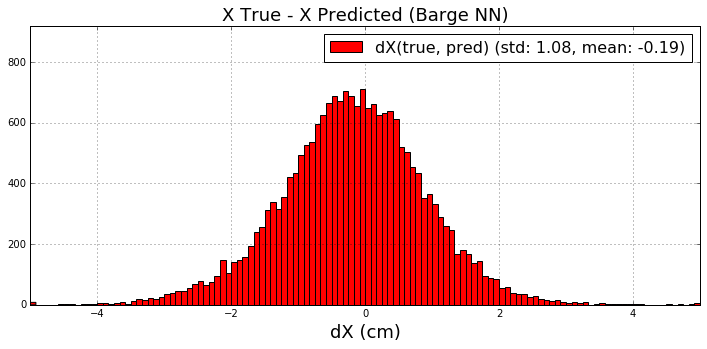

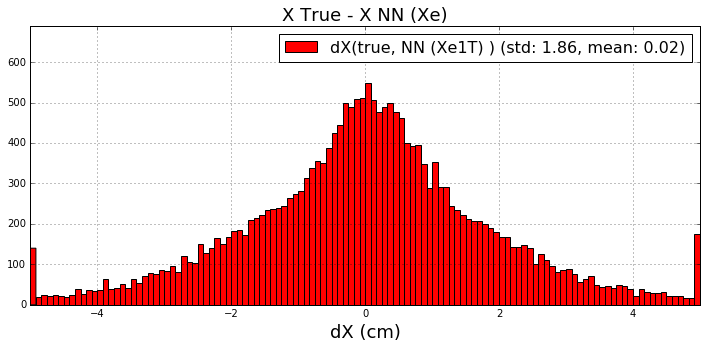

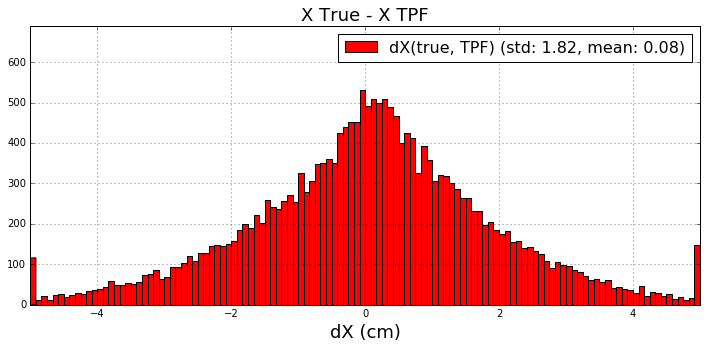

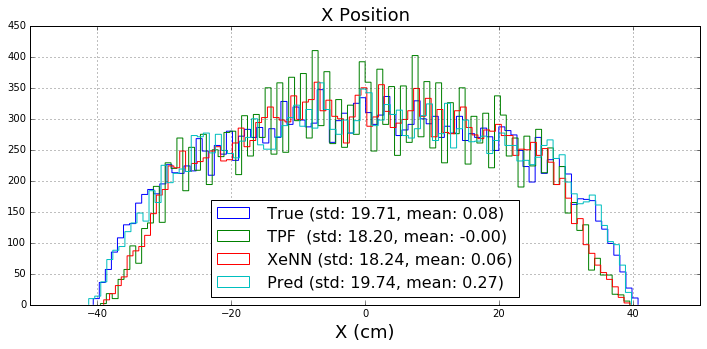

In [4]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_pred, bins=dr_nbins, histtype='bar', color='r', label=dr_label_true_pred)
plt.xlim([-dr_max, dr_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X Predicted (Barge NN)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/x_resolution_barge.png')


####################################################################################################
# Resolution - Xe NN
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_nn , bins=dr_nbins, histtype='bar', color='r', label=dr_label_true_nn)
plt.xlim([-dr_max, dr_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X NN (Xe)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/x_resolution_nn-Xe1T.png')


####################################################################################################
# Resolution - TPF
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_tpf, bins=dr_nbins, histtype='bar', color='r', label=dr_label_true_tpf)
plt.xlim([-dr_max, dr_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X TPF', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Position
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_r_true, bins=r_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_r_tpf , bins=r_nbins, fill=False, histtype='step', label=label_tpf )
plt.hist(arr_r_nn  , bins=r_nbins, fill=False, histtype='step', label=label_nn  )
plt.hist(arr_r_pred, bins=r_nbins, fill=False, histtype='step', label=label_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

plt.savefig('plots/xy_position.png')
